In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

In [22]:
df_train = pd.read_pickle("./data/data_v2_train.pickle")
df_test = pd.read_pickle("./data/data_v2_test.pickle")

len(df_train), len(df_test)

(11228, 6231)

## General dataset analysis

In [23]:
print(len(df_train.columns))
print(', '.join(df_train.columns))
print(', '.join([c for c in df_train.columns if c not in df_test.columns]))

11
projectID, startDate, endDate, totalCost, ecMaxContribution, frameworkProgramme, num_papers, num_patents, category, label, TFIDF
category, label


In [24]:
df_train.head(3)

,projectID,startDate,endDate,totalCost,ecMaxContribution,frameworkProgramme,num_papers,num_patents,category,label,TFIDF
0,305282,2012-09-30 22:00:00,2017-03-30 22:00:00,8055788.47,6000000.0,FP7,1,0,"[1, 6]","[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.04742882392942083, 0.0, 0.0, 0.0, 0.0,..."
1,318997,2013-08-31 22:00:00,2017-08-30 22:00:00,304200.00,304200.0,FP7,19,0,"[4, 7, 21]","[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,101075873,2023-08-31 22:00:00,2028-08-30 22:00:00,1499351.00,1499351.0,HORIZON,0,0,"[6, 12, 20]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11228 entries, 0 to 17458
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   projectID           11228 non-null  int64         
 1   startDate           11204 non-null  datetime64[ns]
 2   endDate             11204 non-null  datetime64[ns]
 3   totalCost           11228 non-null  float64       
 4   ecMaxContribution   11228 non-null  float64       
 5   frameworkProgramme  11228 non-null  object        
 6   num_papers          11228 non-null  int64         
 7   num_patents         11228 non-null  int64         
 8   category            11228 non-null  object        
 9   label               11228 non-null  object        
 10  TFIDF               11228 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 1.0+ MB


In [26]:
df_train.describe()

,projectID,startDate,endDate,totalCost,ecMaxContribution,num_papers,num_patents
count,1.122800e+04,11204,11204,1.122800e+04,1.122800e+04,11228.000000,11228.000000
mean,1.843973e+07,2016-09-05 12:28:34.209211136,2019-12-14 01:30:07.711531776,2.201956e+06,1.820448e+06,10.753919,0.675454
min,1.150010e+05,2007-08-31 22:00:00,2008-10-13 22:00:00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,3.196145e+05,2013-02-28 23:00:00,2016-07-21 10:00:00,1.596429e+05,1.714608e+05,0.000000,0.000000
50%,7.216905e+05,2016-12-31 23:00:00,2019-10-30 23:00:00,6.050117e+05,7.893980e+05,1.000000,0.000000
75%,8.726515e+05,2020-01-31 23:00:00,2023-08-30 22:00:00,2.499969e+06,2.483566e+06,9.000000,0.000000
max,1.901995e+08,2024-08-31 22:00:00,2029-08-30 22:00:00,2.458455e+08,1.792371e+08,5857.000000,289.000000
std,4.026365e+07,NaN,NaN,5.746719e+06,3.539188e+06,68.767393,5.170965


## Histograms and outlier detection

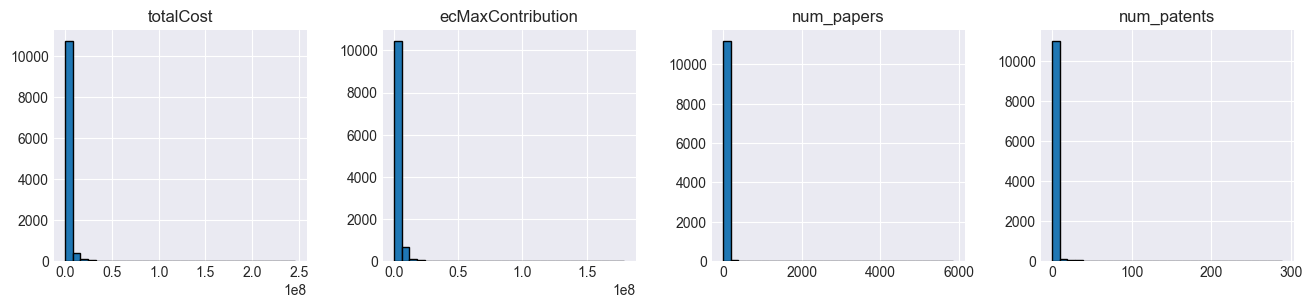

In [27]:
def plot_hists(df, hist_columns):
    fig, axis = plt.subplots(1, len(hist_columns), figsize=(16,3))
    df[hist_columns].hist(ax=axis, edgecolor='black', grid=True, bins=30)
    plt.show()

hist_columns = ["totalCost", "ecMaxContribution", "num_papers", "num_patents"]
plot_hists(df_train, hist_columns)

In [28]:
for c in hist_columns:
    print(c, len(df_train[c].unique()))

totalCost 6095
ecMaxContribution 6106
num_papers 193
num_patents 66


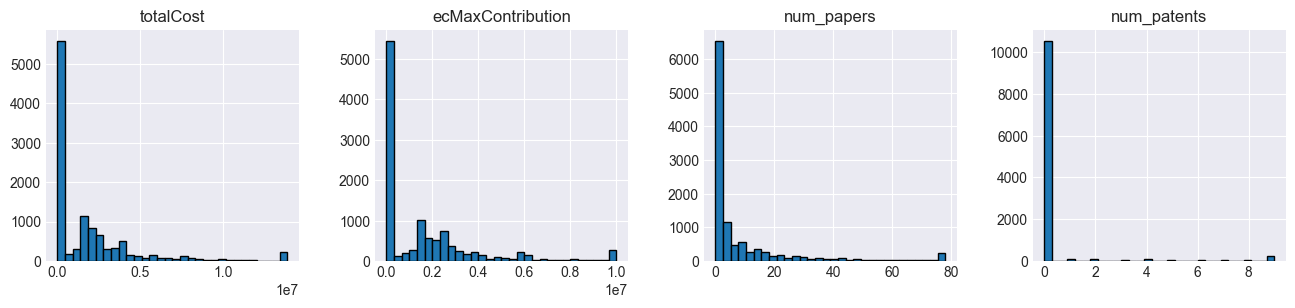

In [29]:
def outlier_clipping(df, col, q):
    q_high = df[col].quantile(q)
    outliers = df[col] > q_high
    df.loc[outliers,col] = q_high

outlier_columns = ["totalCost", "ecMaxContribution", "num_papers", "num_patents"]
for c in outlier_columns:
    outlier_clipping(df_train, c, 0.98)

plot_hists(df_train, outlier_columns)

## TFIDF analysis

(11228, 2000)

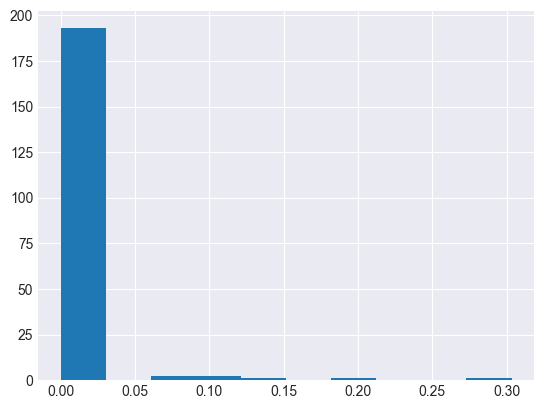

In [30]:
vectors = np.array([list(a) for a in df_train.TFIDF])
plt.hist(vectors.flat[np.random.choice(11228*2000, 200, replace=True)])
vectors.shape

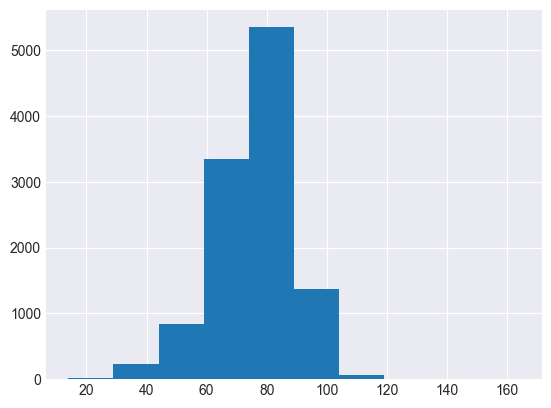

(14, 164, 0)

In [35]:
non_zeros = np.sum(np.where(vectors != 0, 1, 0), axis=1)
plt.hist(non_zeros)
plt.show()
np.min(non_zeros), np.max(non_zeros), np.sum(np.where(np.all(vectors == 0, axis=1), 1, 0))

In [32]:
vectors_test = np.array([list(a) for a in df_test.TFIDF])
np.max(np.sum(np.where(vectors_test != 0, 1, 0), axis=1)), np.sum(np.where(np.all(vectors_test == 0, axis=1), 1, 0))

(158, 0)

## Class imbalance

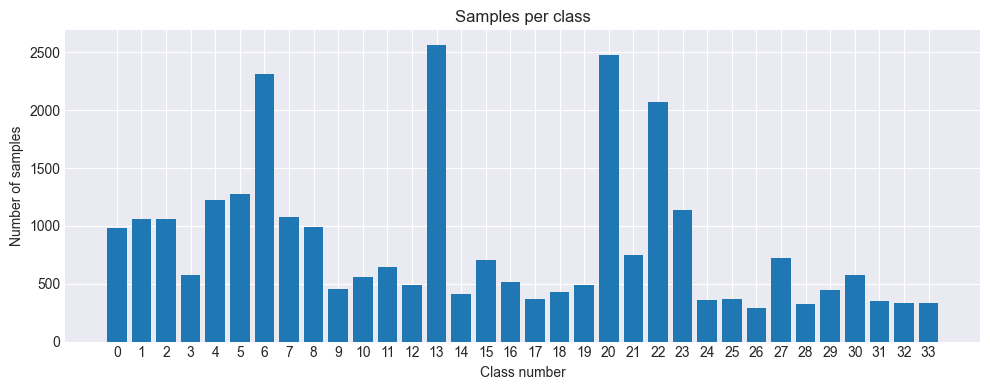

In [33]:
samples_per_class = np.sum(df_train.label, axis=0)

fig, ax = plt.subplots(figsize=(10, 4), layout='tight')
ax.bar(np.arange(0, 34), samples_per_class)
ax.set_xticks(np.arange(0,34))
ax.set_title('Samples per class')
ax.set_xlabel('Class number')
ax.set_ylabel('Number of samples')
plt.show()